<p>
    <h3>Part A</h3>
    <br/>
    <strong> DOMAIN: Entertainment</strong>
    <br/>
    <strong> CONTEXT</strong>
    Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie
and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and
multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved in the
 
<strong> DATA DESCRIPTION: </strong>The dataset comprises of images and its mask for corresponding human face.
<br/>
<strong>PROJECT OBJECTIVE:</strong> To build a face detection system.
</p> 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

# Import label encoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# PCA
from sklearn.decomposition import PCA
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
import os
import cv2
from pathlib import Path
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import keras
import keras.backend as K

In [2]:
#Load .npy file 
images = np.load('images.npy', allow_pickle=True)
print(images.shape)

(409, 2)


In [3]:
print(images[0][0])

[[[42 37 34]
  [56 51 48]
  [71 66 63]
  ...
  [23 33 34]
  [26 36 37]
  [28 38 39]]

 [[40 35 32]
  [51 46 43]
  [64 59 56]
  ...
  [27 36 35]
  [24 33 32]
  [26 35 34]]

 [[43 38 35]
  [51 46 43]
  [61 56 53]
  ...
  [28 30 27]
  [33 35 32]
  [35 37 34]]

 ...

 [[56 47 40]
  [57 48 41]
  [61 52 45]
  ...
  [67 48 42]
  [55 35 28]
  [60 40 33]]

 [[53 44 37]
  [54 45 38]
  [57 48 41]
  ...
  [59 40 34]
  [60 40 33]
  [54 34 27]]

 [[53 44 37]
  [54 45 38]
  [57 48 41]
  ...
  [59 40 34]
  [70 50 43]
  [64 44 37]]]


In [4]:
print(images[100][1][0])

{'label': ['Face'], 'notes': '', 'points': [{'x': 0.26327193932827736, 'y': 0.18497109826589594}, {'x': 0.3206933911159263, 'y': 0.28516377649325625}], 'imageWidth': 1280, 'imageHeight': 720}


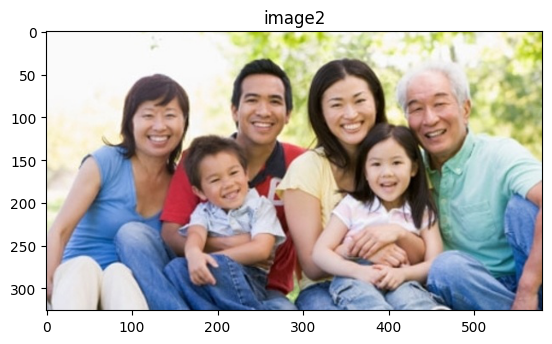

In [5]:
# .npy image before image
plt.imshow(images[4][0])
plt.title('image2')
plt.show()

In [6]:
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
def seperation_data():
    image_df= pd.DataFrame(columns=['image_name', 'Lables', 'x1', 'y1', 'x2', 'y2', 'iw', 'ih'])
    img_list=[]
    label_name=[]
    x1=[]
    y1=[]
    x2 =[]
    y2 =[]
    iw = []
    ih = []
    X_images=[]
    Y_images= []
    for i in range(images.shape[0]):
        img=images[i][0]
        resize_image = cv2.resize(img, (128,128))
        lbl=images[i][1][0]['label'][0]
        a1 = images[i][1][0]['points'][0]['x']
        b1 = images[i][1][0]['points'][0]['y']
        a2 = images[i][1][0]['points'][1]['x']
        b2 = images[i][1][0]['points'][1]['y']
        w = images[i][1][0]['imageWidth']
        h = images[i][1][0]['imageHeight']
        img_list.append(images[i][0])
        #label_name.append(images[i][1][0]['label'][0])
        x1.append(images[i][1][0]['points'][0]['x'])
        y1.append(images[i][1][0]['points'][0]['y'])
        x2.append(images[i][1][0]['points'][1]['x'])
        y2.append(images[i][1][0]['points'][1]['y'])
        iw.append(images[i][1][0]['imageWidth'])
        ih.append(images[i][1][0]['imageHeight'])
        Y_images.append(resize_image)
        label_name.append(resize_image)
        #face-Detation
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            X_images.append(img)
            
    image_df['image_name'] = img_list
    image_df['Lables'] = label_name
    image_df['x1'] = x1
    image_df['y1'] = y1
    image_df['x2'] = x2
    image_df['y2'] = y2
    image_df['iw'] = iw
    image_df['ih'] = ih
    return image_df, X_images, Y_images

In [8]:
image_df, face_image, Y_images = seperation_data()
image_df

,image_name,Lables,x1,y1,x2,y2,iw,ih
0,"[[[42, 37, 34], [56, 51, 48], [71, 66, 63], [7...","[[[65, 60, 58], [58, 53, 50], [36, 29, 29], [2...",0.086154,0.306306,0.172308,0.453453,650,333
1,"[[[207, 216, 227, 255], [206, 216, 227, 255], ...","[[[206, 215, 226, 255], [204, 216, 226, 255], ...",0.705309,0.232604,0.769231,0.361829,1280,697
2,"[[[91, 61, 33], [95, 65, 37], [94, 64, 38], [9...","[[[95, 65, 38], [87, 59, 35], [95, 67, 46], [8...",0.469565,0.050000,0.606522,0.333333,460,240
3,"[[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...","[[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...",0.495000,0.271478,0.595000,0.460481,600,291
4,"[[[250, 250, 250], [250, 250, 250], [250, 250,...","[[[250, 250, 250], [250, 250, 250], [250, 250,...",0.558621,0.199387,0.660345,0.377301,580,326
...,...,...,...,...,...,...,...,...
404,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.171964,0.018841,0.599022,0.849275,1280,720
405,"[[[21, 36, 17], [21, 36, 17], [21, 36, 17], [2...","[[[23, 36, 19], [24, 41, 22], [23, 38, 19], [2...",0.607438,0.091912,0.905992,0.678309,1280,720
406,"[[[2, 2, 4], [1, 2, 4], [1, 2, 4], [2, 3, 5], ...","[[[1, 5, 6], [9, 15, 15], [13, 23, 22], [15, 2...",0.331703,0.005797,0.499593,0.352174,1280,720
407,"[[[20, 4, 4], [20, 4, 4], [20, 4, 4], [20, 4, ...","[[[20, 4, 4], [20, 4, 4], [25, 14, 12], [35, 2...",0.202139,0.354086,0.313369,0.618677,935,514


In [9]:
face_image[1]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_df["image_name"],image_df["Lables"], train_size=0.9)

In [11]:
#Split the data into train and test
x_trains = image_df["image_name"][0:400]
x_tests = image_df["image_name"][400:]
y_images = image_df["Lables"]
print("Train", x_trains.shape)
print("test", x_tests.shape)
print("Y lable", y_images.shape)

Train (400,)
test (9,)
Y lable (409,)


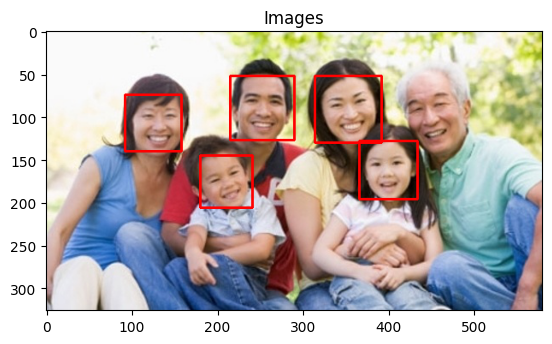

In [12]:
#Face After face Detection apply
plt.imshow(face_image[6])
plt.title('Images')
plt.show()

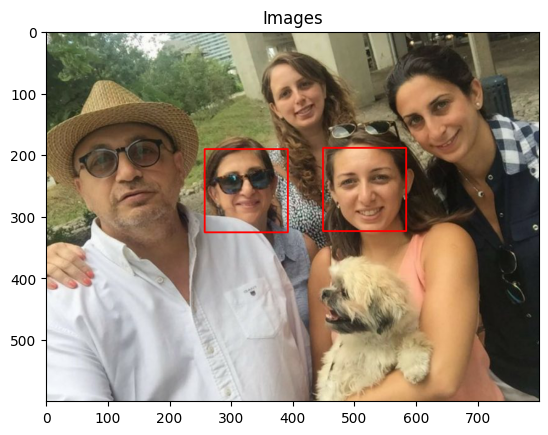

In [13]:
#Random Image Face Detection
plt.imshow(face_image[75])
plt.title('Images')
plt.show()

In [14]:
#Keras
def DiceLoss(targets, inputs, smooth=1e-6):
    #flatten label and prediction tensors
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)
    intersection = K.sum(K.dot(targets, inputs))
    dice = (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
    return 1 - dice

<p>
<h3> Part-B</h3>
<strong>DOMAIN: Entertainment</strong>
<br/>
<strong> CONTEXT:</strong> 
<br/>
Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription
basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on
the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer
vision and multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved in the
</p>

In [15]:
#Loading trainin_images
path=Path.cwd()
impage_path=os.path.join(path, "training_images.zip")
with ZipFile(impage_path, 'r') as zipObj:
    zipObj.extractall(path)

In [16]:
image_location = os.path.join(path, "training_images")
print(image_location)

E:\aiml\cv2_project\training_images


In [17]:
#Training Image Process, From the same loop above, extract metadata of the faces and write into a DataFrame
X = []
faces_count = []
Img_name = []
df = pd.DataFrame(columns=['Image Name', 'Total_Faces', 'x', 'y', 'w', 'h'])
a = []
b = []
c = []
d = []
for image_name in os.listdir(image_location):
    image_path =  os.path.join(image_location,image_name)
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        faces_count.append(len(faces))
        Img_name.append(image_name)
        a.append(x)
        b.append(y)
        c.append(w)
        d.append(h)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        X.append(image)
        
df['Total_Faces'] = faces_count
df['Image Name'] = Img_name
df['x'] = a
df['y'] = b
df['w'] = c
df['h'] = d

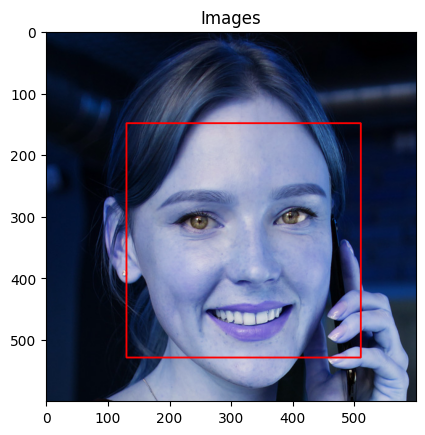

In [18]:
# Face Detation
plt.imshow(X[30])
plt.title('Images')
plt.show()

In [19]:
df.head()

,Image Name,Total_Faces,x,y,w,h
0,real_00001.jpg,1,134,125,430,430
1,real_00002.jpg,1,79,143,430,430
2,real_00003.jpg,1,34,116,369,369
3,real_00004.jpg,1,122,157,380,380
4,real_00006.jpg,1,61,49,480,480


In [20]:
# Only one image has 2 faces detected from the dataset of face images, all others have only 1 face detected
df['Total_Faces'].value_counts()

1    692
2      2
Name: Total_Faces, dtype: int64

In [21]:
# The image with 2 faces detected'
df[df['Total_Faces']==2]

,Image Name,Total_Faces,x,y,w,h
459,real_00735.jpg,2,73,150,393,393
460,real_00735.jpg,2,507,165,59,59


In [22]:
#saving the dataframe Save the output Dataframe in .csv format
df.to_csv('training_images.csv')

<p> <h3> Part C</h3> 
    <strong> DOMAIN: Face Recognition</strong>
    <br>
    <strong> CONTEXT:</strong>
    Company X intends to build a face identification model to recognise human faces.
    <br/>
    <strong>DATA DESCRIPTION:</strong>
    The dataset comprises of images and its mask where there is a human face.
    <br/>
    <strong>PROJECT OBJECTIVE: </strong>
    Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
    from 'Pinterest' and aligned using dlib library. Some data samples:
</p>

In [23]:
#loading Pins Image Reading and extraction from zip folder 
path=Path.cwd()
pins_images_path=os.path.join(path, "PINS.zip")
with ZipFile(pins_images_path, 'r') as zipObj:
    zipObj.extractall(path)
    
pins_images_location=os.path.join(path, "PINS")
print("PINS Image Path:")
print(pins_images_location)    

PINS Image Path:
E:\aiml\cv2_project\PINS


In [24]:
#Q2 - Function to create metadata of the image
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

In [25]:
#Q3 - Function to load metadata
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [26]:
def load_image(image_path):
    # Read the image in BGR color space
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    # Convert the image from RGB to BGR
    images = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return images

In [27]:
metadata = load_metadata(pins_images_location)

In [28]:
#Image full path
metadata[0].image_path()

'E:\\aiml\\cv2_project\\PINS\\pins_Aaron Paul\\Aaron Paul0_262.jpg'

In [29]:
load_image(metadata[0].image_path()).shape

(301, 299, 3)

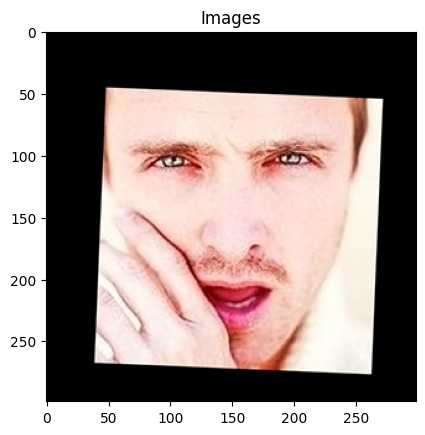

In [30]:
# Face of image
plt.imshow(load_image(metadata[2].image_path()))
plt.title('Images')
plt.show()

In [32]:
def vgg_face_detection():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [33]:
# Loading VGG weights onto the VGG face Model instance created
model = vgg_face_detection()
model.load_weights("vgg_face_weights.h5")

In [34]:
# Get model upto last flatten layer #with outputs 2622 units 
vgg_face_detection_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output) 

type(vgg_face_detection_descriptor)

keras.engine.functional.Functional

In [35]:
# Input and Output for the defined VGG Face model
vgg_face_detection_descriptor.inputs, vgg_face_detection_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [38]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    image_path = metadata[i].image_path()
    image = load_image(image_path)
    image = (image / 255.).astype(np.float32)
    image = cv2.resize(image, dsize = (224,224))
    embedding_vector = vgg_face_detection_descriptor.predict(np.expand_dims(image, axis=0))[0]
    embeddings[i] = embedding_vector

1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 168ms/step


1/1 [==============================] - 0s 160ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 160ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 173ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 176ms/step


1/1 [==============================] - 0s 189ms/step


1/1 [==============================] - 0s 186ms/step


1/1 [==============================] - 0s 186ms/step


1/1 [==============================] - 0s 185ms/step


1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 0s 194ms/step


1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 192ms/step


1/1 [==============================] - 0s 200ms/step


1/1 [==============================] - 0s 201ms/step


1/1 [==============================] - 0s 209ms/step


1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 212ms/step


1/1 [==============================] - 0s 209ms/step


1/1 [==============================] - 0s 221ms/step


1/1 [==============================] - 0s 214ms/step


1/1 [==============================] - 0s 215ms/step


1/1 [==============================] - 0s 224ms/step


1/1 [==============================] - 0s 233ms/step


1/1 [==============================] - 0s 233ms/step


1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 236ms/step


1/1 [==============================] - 0s 367ms/step


1/1 [==============================] - 0s 372ms/step


1/1 [==============================] - 0s 396ms/step


1/1 [==============================] - 0s 386ms/step


1/1 [==============================] - 0s 393ms/step


1/1 [==============================] - 0s 395ms/step


1/1 [==============================] - 0s 398ms/step


1/1 [==============================] - 0s 415ms/step


1/1 [==============================] - 0s 414ms/step


1/1 [==============================] - 0s 414ms/step


1/1 [==============================] - 0s 422ms/step


In [39]:
embedding_vector

array([ 0.01772302,  0.01064051,  0.01995194, ..., -0.0261843 ,
        0.03288927,  0.0488265 ], dtype=float32)

In [40]:
# printing shape, sample value, type and value type of embedding vector
print(embedding_vector.shape)
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(2622,)


(0.017723016, numpy.ndarray, numpy.float32)

In [41]:
embeddings

array([[ 0.03170304, -0.0150513 , -0.01243402, ...,  0.00043139,
         0.00219081, -0.00908097],
       [ 0.03497701, -0.00105061, -0.01248934, ..., -0.0105309 ,
         0.00179322,  0.02439155],
       [ 0.02801891, -0.00112631, -0.0126575 , ..., -0.00904751,
        -0.00578403,  0.0212583 ],
       ...,
       [ 0.00965872,  0.0037216 , -0.01345864, ..., -0.01433405,
         0.01899945,  0.03899155],
       [ 0.0023093 ,  0.00094764, -0.00544814, ..., -0.01600495,
         0.01053975,  0.0368325 ],
       [ 0.01772302,  0.01064051,  0.01995194, ..., -0.0261843 ,
         0.03288927,  0.0488265 ]])

In [42]:
pd.DataFrame(embeddings).to_csv('pins_data.csv', index = False)

In [43]:
embeddings = (pd.read_csv('pins_data.csv')).to_numpy()

In [44]:
embeddings[0]

array([ 0.03170304, -0.0150513 , -0.01243402, ...,  0.00043139,
        0.00219081, -0.00908097])

In [48]:
# Build distance metrics for identifying the distance between two similar and dissimilar images
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [50]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path())); 

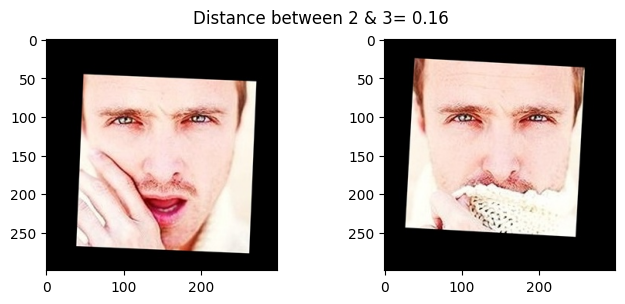

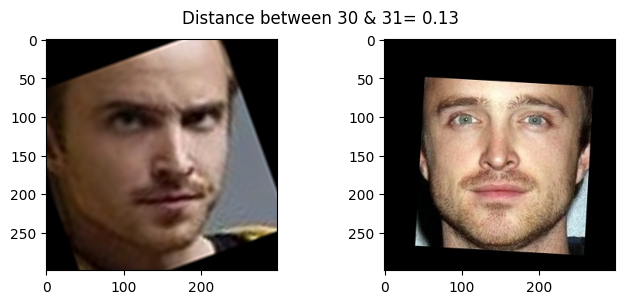

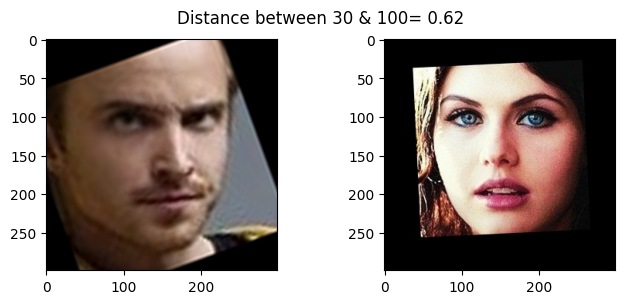

In [51]:
#show image Pair
show_pair(2, 3)
show_pair(30, 31)
show_pair(30,100)

In [52]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# Features
X_train = np.array(embeddings)[train_idx]
X_test = np.array(embeddings)[test_idx]

# Labels
y_train = np.array([meta.name for meta in metadata[train_idx]])
y_test = np.array([meta.name for meta in metadata[test_idx]])

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 2622)

(1197, 2622)

(9573,)

(1197,)

In [53]:
# Label encoding the labels
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [54]:
# Standarize features
scaler = preprocessing.StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [55]:
X_train_sc.shape

(9573, 2622)

In [56]:
# Covariance matrix required for PCA Analysis
covMatrix = np.cov(X_train_sc,rowvar=False)
print(covMatrix)

[[ 1.00010447  0.1190614   0.11212236 ...  0.07831712 -0.12052832
  -0.25350846]
 [ 0.1190614   1.00010447  0.22992734 ... -0.03788629  0.28324408
   0.21235847]
 [ 0.11212236  0.22992734  1.00010447 ... -0.1101408   0.06444031
   0.03514267]
 ...
 [ 0.07831712 -0.03788629 -0.1101408  ...  1.00010447 -0.01797866
  -0.09188741]
 [-0.12052832  0.28324408  0.06444031 ... -0.01797866  1.00010447
   0.39490282]
 [-0.25350846  0.21235847  0.03514267 ... -0.09188741  0.39490282
   1.00010447]]


In [57]:
pca = PCA(n_components = 400)
pca.fit(X_train_sc)

PCA(n_components=400)

In [58]:
PCA(n_components=400)

PCA(n_components=400)

In [59]:
# Percentage of variation explained by each Eigen Vector
print(pca.explained_variance_ratio_)

[1.35841680e-01 5.36451046e-02 3.99374675e-02 3.68994205e-02
 3.40894599e-02 3.14059051e-02 2.57597320e-02 2.34910938e-02
 2.10050198e-02 1.92962873e-02 1.81765957e-02 1.69933409e-02
 1.65765614e-02 1.56228671e-02 1.42634185e-02 1.36878645e-02
 1.30514296e-02 1.22249254e-02 1.14920101e-02 1.13327054e-02
 1.08814251e-02 1.06313378e-02 9.66053950e-03 9.40140390e-03
 9.11942042e-03 8.78629506e-03 8.35910383e-03 7.73467395e-03
 7.67258709e-03 7.36167807e-03 7.03663732e-03 6.56914369e-03
 6.33665946e-03 6.23291278e-03 5.67602092e-03 5.36954824e-03
 5.31394403e-03 5.14554874e-03 5.01931041e-03 4.85850360e-03
 4.43701641e-03 4.30729706e-03 3.98594242e-03 3.93988891e-03
 3.70836919e-03 3.55103202e-03 3.45134486e-03 3.33473252e-03
 3.26213670e-03 3.18778806e-03 3.12468266e-03 3.08792497e-03
 2.91246707e-03 2.81896492e-03 2.78437263e-03 2.72210703e-03
 2.70750292e-03 2.63883435e-03 2.51598511e-03 2.50692694e-03
 2.38084196e-03 2.31172512e-03 2.24604298e-03 2.17425210e-03
 2.12663956e-03 2.048448

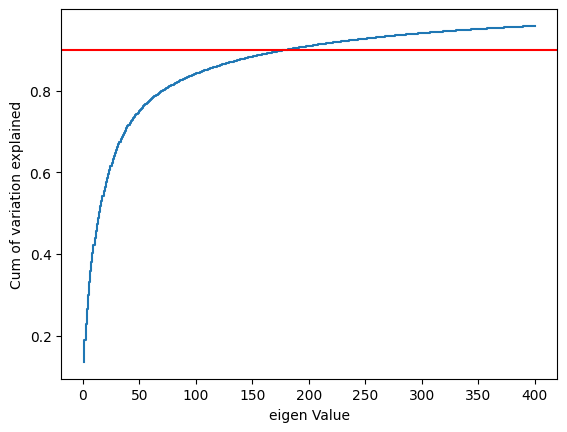

In [60]:
# % cumulative variance explained using PCA with respect to the eigen values
from matplotlib import pyplot as plt
plt.step(range(1,401),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()
     

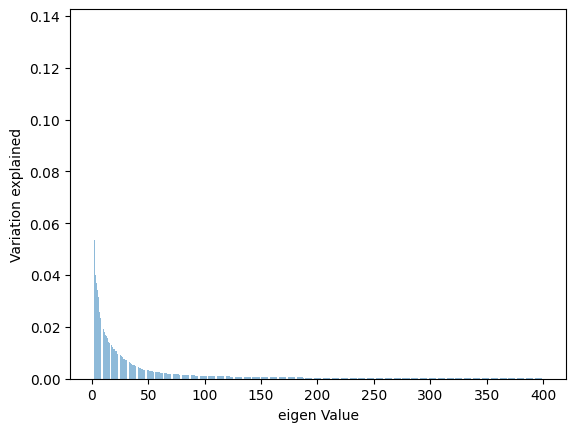

In [61]:
plt.bar(range(1,401),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [62]:
#Applying 125 principal components to fit the Scaled and balanced X data
pca_125 = PCA(n_components = 125)
pca_125.fit(X_train_sc)
print(pca_125.components_, "\n\n")
print(pca_125.explained_variance_ratio_)
X_train_sc_pca_125 = pca_125.transform(X_train_sc)
X_test_sc_pca_125 = pca_125.transform(X_test_sc)

[[-0.02388658  0.00862043 -0.00341474 ... -0.00802623  0.02108777
   0.03879666]
 [ 0.02041368 -0.00126856  0.00789221 ... -0.02338634 -0.00439965
   0.01097761]
 [ 0.00295589  0.00191406 -0.00756269 ...  0.01113672 -0.00111494
  -0.01617017]
 ...
 [ 0.02846858 -0.00170328  0.00274817 ...  0.00433771  0.02907281
  -0.02359881]
 [-0.03926778 -0.02000868  0.02461111 ... -0.01280089 -0.01075864
  -0.0041842 ]
 [ 0.03727211 -0.02275125 -0.02027897 ... -0.01329745 -0.00065435
  -0.0082805 ]] 


[0.13584168 0.0536451  0.03993747 0.03689942 0.03408946 0.03140591
 0.02575973 0.02349109 0.02100502 0.01929629 0.0181766  0.01699334
 0.01657656 0.01562287 0.01426342 0.01368786 0.01305143 0.01222493
 0.01149201 0.01133271 0.01088143 0.01063134 0.00966054 0.0094014
 0.00911942 0.0087863  0.0083591  0.00773467 0.00767259 0.00736168
 0.00703664 0.00656914 0.00633666 0.00623291 0.00567602 0.00536955
 0.00531394 0.00514555 0.00501931 0.0048585  0.00443702 0.0043073
 0.00398594 0.00393989 0.00370837 0.00

In [63]:
# SVC model created and fit on PCA transformed trainset
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Set random_state
random_state = 2020
svc_pca = SVC(C = 1, gamma = 0.001, kernel = 'rbf', class_weight = 'balanced', random_state = random_state)
svc_pca.fit(X_train_sc_pca_125, y_train)
print('SVC accuracy for train set: {0:.3f}'.format(svc_pca.score(X_train_sc_pca_125, y_train)))

SVC accuracy for train set: 0.999


In [64]:
# Predict
y_pred = svc_pca.predict(X_test_sc_pca_125)

# Accuracy Score
print('Test Accuracy Score: {}'.format(accuracy_score(y_test, y_pred).round(3)))

Test Accuracy Score: 0.947


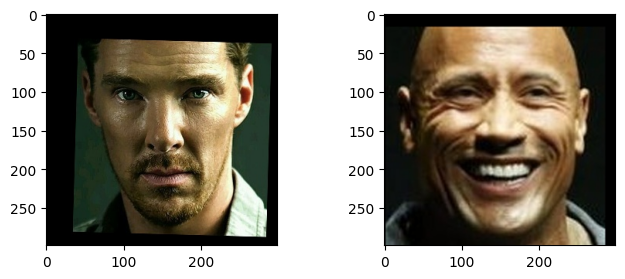

In [67]:
# Predict for 2 specific example images
image_path_1 = 'BenedictCumberbatch9.jpg'
image_path_2 = 'DwayneJohnson4.jpg'
image_1 = load_image(image_path_1)
image_2 = load_image(image_path_2)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(image_1)
plt.subplot(122)
plt.imshow(image_2)
plt.show()

In [68]:
# Normalize, Resize and create embedding vectors for example images for model prediction 
image_1 = (image_1 / 255.).astype(np.float32)
image_1 = cv2.resize(image_1, dsize = (224,224))
embedding_vector_1 = vgg_face_detection_descriptor.predict(np.expand_dims(image_1, axis=0))[0]

image_2 = (image_2 / 255.).astype(np.float32)
image_2 = cv2.resize(image_2, dsize = (224,224))
embedding_vector_2 = vgg_face_detection_descriptor.predict(np.expand_dims(image_2, axis=0))[0]

1/1 [==============================] - 0s 451ms/step


In [69]:
# Reshape embedding vectors of 2 example images
embedding_vector_1 = np.reshape(embedding_vector, (1, 2622))
embedding_vector_2 = np.reshape(embedding_vector, (1, 2622))
embedding_vector_1.shape


(1, 2622)

In [70]:
# Scale embedding vectors
embedding_vector_sc_1 = scaler.fit_transform(embedding_vector_1)
embedding_vector_pca_1 = pca_125.transform(embedding_vector_sc_1)

embedding_vector_sc_2 = scaler.fit_transform(embedding_vector_2)
embedding_vector_pca_2 = pca_125.transform(embedding_vector_sc_2)

In [71]:
# Predict from transformed embedding vectors for 2 example images
y_pred_1 = svc_pca.predict(embedding_vector_pca_1)
y_pred_2 = svc_pca.predict(embedding_vector_pca_2)
print ('Prediction for Image 1 - Benedict Cumberbatch : ', y_pred_1)
print ('Prediction for Image 2 - Dwayne Johnson : ', y_pred_2)

Prediction for Image 1 - Benedict Cumberbatch :  [89]
Prediction for Image 2 - Dwayne Johnson :  [89]
